# P2 William GALBY : Analyse approfondie des données du TITANIC

## But de l'analyse

Trouver des incohérences dans le fichier plat "train" au format CSV pour aider un client qui se trouve face à un procès à travers le temps.

## Import des outils

In [162]:
import pandas as pd
import csv as csv
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn

- pandas : 
- csv : 
- numpy : 
- scipy.stats : 
- matplotlib.pyplot : 
- sklearn : 

## Import des données pour manipulation

In [163]:
df = pd.read_csv('train.csv', header=0)

- df pour dataframe
- header = 0 indique qu'il y a un titres sur chaque colonne

## Observation des colonnes

In [164]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Nous pouvons en déduire la signification des colonnes suivantes :
    - PassengerId : identifiant passager
    - Survived : variable booléenne, 0 = n'a pas survécu ; 1 = a survécu
    - Pclass : classe du voyageur, 1 ; 2 ; 3
    - Name : nom et prénom du passager
    - Sex : variable booléenne, male ; female
    - Age : age du passager
    - SibSp: Nombre de frères, soeurs ou époux/épouse
    - Parch: Nombre de Père/Mère
    - Ticket : numéro de ticket du passager
    - Fare: Prix du ticket du passager
    - Cabin: Numéro de cabine
    - Embarked: Lieu d'embarcation, C = Cherbourg; Q = Queenstown; S = Southampton

## Observation des lignes

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- Il y a 891 lignes, les colonnes suivantes sont donc imcomplètes et vont devoir être complétés pour 
éviter qu'elles ne faussent nos futures analyses :
    - Age
    - Cabin : Beaucoup trop de données manquantes pour remplire de manière cohérentes cette colonne. Par exemple lorsque l'on regarde les cabines commençant par la lettre 'B', il y a des passagers de tous ages, qui à des prix différents. On observe par contre que la classe et la cabine on une relation mais il y a trop de cabine (exemple pour la classe 1 : A, B, C, D, E, T)
    - Embarked

## Nettoyage des données : Age

In [166]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

## Nettoyage des données : Embarked

In [167]:
df['Embarked'].fillna(0, inplace=True)
for indice, valeur in enumerate(df['Embarked']):
    if valeur == 0:
        print 'Nom complet : ' + df['Name'][indice] + ' ;\n Sex : ' + df['Sex'][indice] + ' ;\n Numéro de ticket : ' + df['Ticket'][indice] + ' ;\n Cabine numéro : ' + df['Cabin'][indice]+ ' ;\n Prix : ' + df['Fare'][indice].astype(np.str)  + ' ;\n Classe : ' + df['Pclass'][indice].astype(np.str) 

Nom complet : Icard, Miss. Amelie ;
 Sex : female ;
 Numéro de ticket : 113572 ;
 Cabine numéro : B28 ;
 Prix : 80.0 ;
 Classe : 1
Nom complet : Stone, Mrs. George Nelson (Martha Evelyn) ;
 Sex : female ;
 Numéro de ticket : 113572 ;
 Cabine numéro : B28 ;
 Prix : 80.0 ;
 Classe : 1


- Les deux seules personnes dont il manque le lieu d'ebarcation sont identique, si ce n'est l'âge (et l'id bien entendu). Elle voyagait ensemble pour sûr ! Etrange...

## Nettoyage des données : Sex

In [168]:
df['Gender'] = 12
df['Gender'] = df['Sex'].map( lambda x: x[0].upper())
print df['Gender']

0      M
1      F
2      F
3      F
4      M
5      M
6      M
7      M
8      F
9      F
10     F
11     F
12     M
13     M
14     F
15     F
16     M
17     M
18     F
19     F
20     M
21     M
22     F
23     M
24     F
25     F
26     M
27     M
28     F
29     M
      ..
861    M
862    F
863    F
864    M
865    F
866    F
867    M
868    M
869    M
870    M
871    F
872    M
873    M
874    F
875    F
876    M
877    M
878    M
879    F
880    F
881    M
882    F
883    M
884    M
885    F
886    M
887    F
888    F
889    M
890    M
Name: Gender, dtype: object


- Pour une question de facilité de manipulation des données, rajoutons une colonne à la fin du dataset originel correspondant au Sex sous forme de Genre M ou F

## Analyse du tarif : Nuage de points et régression linaire : 

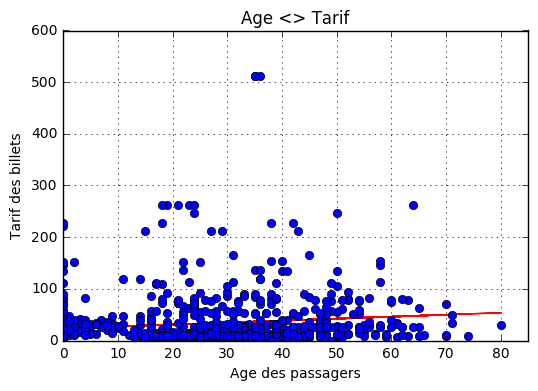

In [169]:
df = pd.read_csv('train.csv', header=0)
df.fillna(0, inplace=True)
Age  = df['Age']
Age = Age.astype(np.int64)
Tarif = df['Fare']
a, b, c, d, e = ss.linregress(Age,Tarif)
plt.figure();
plt.title('Age <> Tarif')
plt.xlabel('Age des passagers')
plt.ylabel('Tarif des billets')
plt.plot(Age, Tarif, 'k.')
line = a*Age+b
plt.plot(Age,line,'r-',Age,Tarif,'o')
plt.axis([0, 85, 0, 600])
plt.grid(True)
plt.show()

- L'age et le tarif étant les deux seules valeurs vraiment varible, je me base sur celle-ci pour effectuer une regression linéaire convenable. Ici, celle-ci n'a pas vraiment de sens car elle servirait à déterminer quel tarif aurait un passage en fonction de son age. Néanmoins, nous pouvons voir plus facilement grâce à celle-ci les valeurs résiduelles.

## Analyse du tarif : Proportions

In [170]:
#Etablissement de la moyenne du billet
dfdata = np.array(df)
dfdata = dfdata[1::]
fare = dfdata[0::,9].astype(np.float)
moyenneBillet = np.average(fare)
print('Prix moyen du billet : {p: .2f} €'.format(p=moyenneBillet))

listePascher = fare < moyenneBillet
listeCher = fare >= moyenneBillet
pauvres = 0
riches = 0
for i in listePascher:
    if i == True:
        pauvres = pauvres + 1
for i in listeCher:
    if i == True:
        riches = riches + 1

pourcentagePauvres = float(pauvres)/float(pauvres+riches)
pourcentageRiches  = float(riches)/float(pauvres+riches)

print('Proportion de pauvres {p:.2f}'.format(p=pourcentagePauvres))
print('Proportion de riches {p:.2f}'.format(p=pourcentageRiches))

pauvresOK = dfdata[listePascher,1].astype(np.float)
richesOK = dfdata[listeCher,1].astype(np.float)

pourcentagePauvresOK = (float(np.sum(pauvresOK))/float(np.sum(pauvresOK)+np.sum(richesOK)))*100
pourcentageRichesOK = (float(np.sum(richesOK))/float(np.sum(pauvresOK)+np.sum(richesOK)))*100

print('Pourcentage de pauvres qui survivent {p:.2f}'.format(p=pourcentagePauvresOK))
print('Pourcentage de riches qui survivent {p:.2f}'.format(p=pourcentageRichesOK))

Prix moyen du billet :  32.23 €
Proportion de pauvres 0.76
Proportion de riches 0.24
Pourcentage de pauvres qui survivent 63.16
Pourcentage de riches qui survivent 36.84


- Nous pouvons observer grâce à ce pourcentage final qu'il est plus probable de survivre sur le titanic si nous avons payé le billet en dessous de 32,23€ (ce que nous considérons dans nos calcules comme des pauvres).

## Analyse : Observation des differentes populations

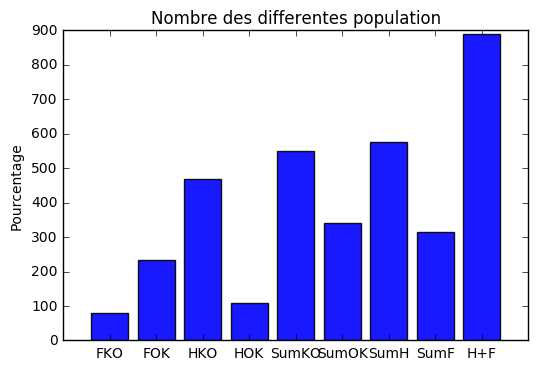

In [160]:
tt = pd.read_csv('train.csv', header=0)

sexF = tt["Sex"] == "female"
sexH = tt["Sex"] == "male"

nbF = len(tt[sexF])
nbH = len(tt[sexH])

#KO -> Morts
survKO = tt["Survived"] == 0
FKO = tt[ sexF & survKO ]
HKO = tt[ sexH & survKO ]
nbFKO = len(FKO)
nbHKO = len(HKO)
#OK -> survivants
survOK = tt["Survived"] == 1
HOK = tt [ sexH & survOK ]
FOK = tt [ sexF & survOK ]
nbFOK = len(FOK)
nbHOK = len(HOK)

objects = ('FKO', 'FOK', 'HKO', 'HOK', 'SumKO', 'SumOK', 'SumH', 'SumF', 'H+F')
y_pos = np.arange(len(objects))
performance = [ nbFKO, nbFOK, nbHKO, nbHOK, nbHKO+nbFKO, nbHOK+nbFOK, nbH, nbF, float(nbF+nbH)]
 
plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Pourcentage')
plt.title('Nombre des differentes population')
plt.show()

- Nous pouvons observer grâce à ce graphique que les femmes qui sont surviantes en majoritées sont quasiment autant que la somme des survivants hommes et femmes réunnies

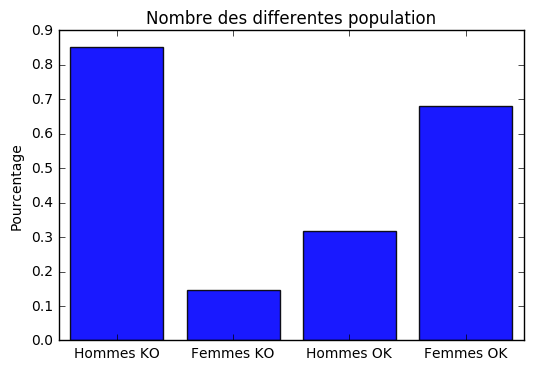

In [171]:
propHKO = float(nbHKO)/float(nbFKO+nbHKO)
propFKO = float(nbFKO)/float(nbFKO+nbHKO)
propHOK = float(nbHOK)/float(nbFOK+nbHOK)
propFOK = float(nbFOK)/float(nbFOK+nbHOK)

objects = ('Hommes KO', 'Femmes KO', 'Hommes OK', 'Femmes OK')
y_pos = np.arange(len(objects))
performance = [ propHKO, propFKO, propHOK, propFOK]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Pourcentage')
plt.title('Nombre des differentes population')
plt.show()

- En pourcentage, ce graphique nous permet de mieux nous rendre compte que les hommes sont ceux qui ont le moins survécu et que donc, les femmes sont celles qui ont le meux survécu.